In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data

df = pd.read_csv('../data/perGameStats/combined.csv')
# df = pd.read_csv('../data/final/2019-school-stats.csv')

In [2]:
# df.sample(5)

# df.describe()

# # Get the number of rows and columns
# df.shape

# # Get the column names
# df.columns

# sns.displot(df['G'], kde=True)

mapa = {'Champions': 8, '2ND' : 7, 'F4' : 6, 'E8' : 5, 'S16' : 4, 'R32' : 3, 'R64' : 2, 'R68' : 1}
df['POSTSEASON_value'] = df['POSTSEASON'].map(mapa)

df['POSTSEASON_value'].value_counts()

2.0    224
3.0    112
4.0     56
5.0     28
1.0     28
6.0     14
8.0      7
7.0      7
Name: POSTSEASON_value, dtype: int64

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

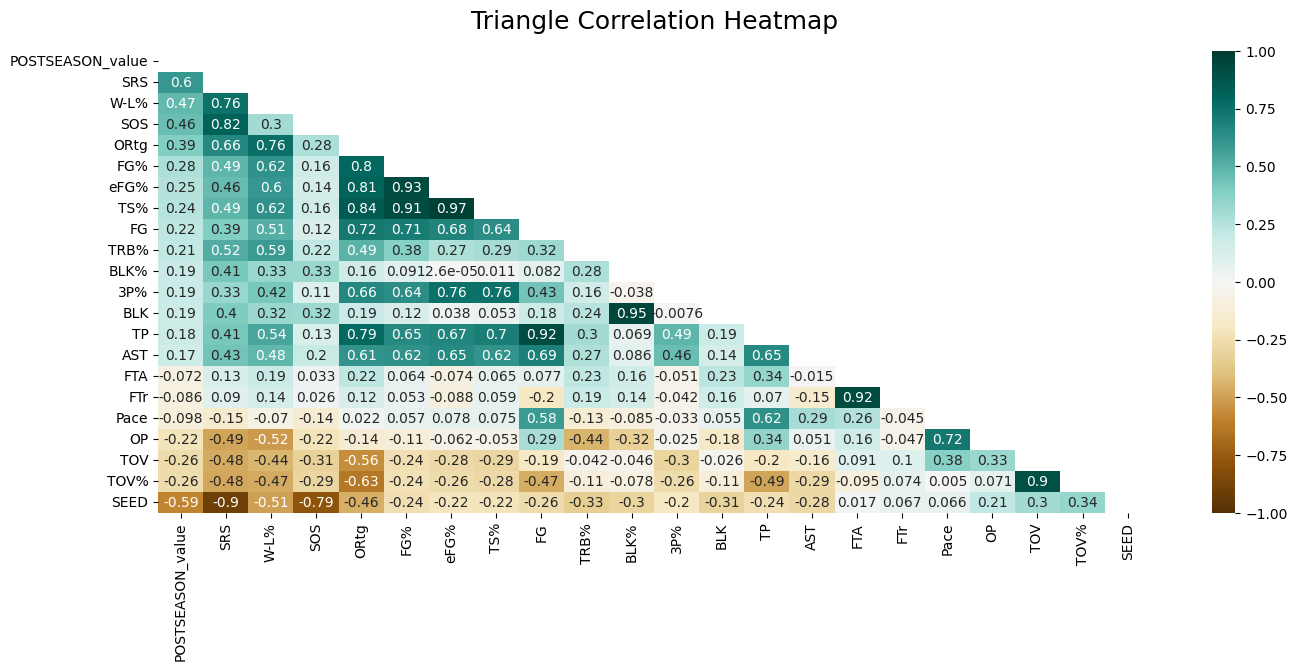

In [3]:
temp = df[['POSTSEASON_value', 'SRS', 'W-L%', 'SOS', 'ORtg', 'FG%', 'eFG%', 'TS%', 'FG', 'TRB%', 'BLK%', '3P%', 'BLK', 'TP', 'AST', 'FTA', 'FTr', 'Pace', 'OP', 'TOV', 'TOV%', 'SEED']]

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(temp.corr(), dtype=bool))
heatmap = sns.heatmap(temp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

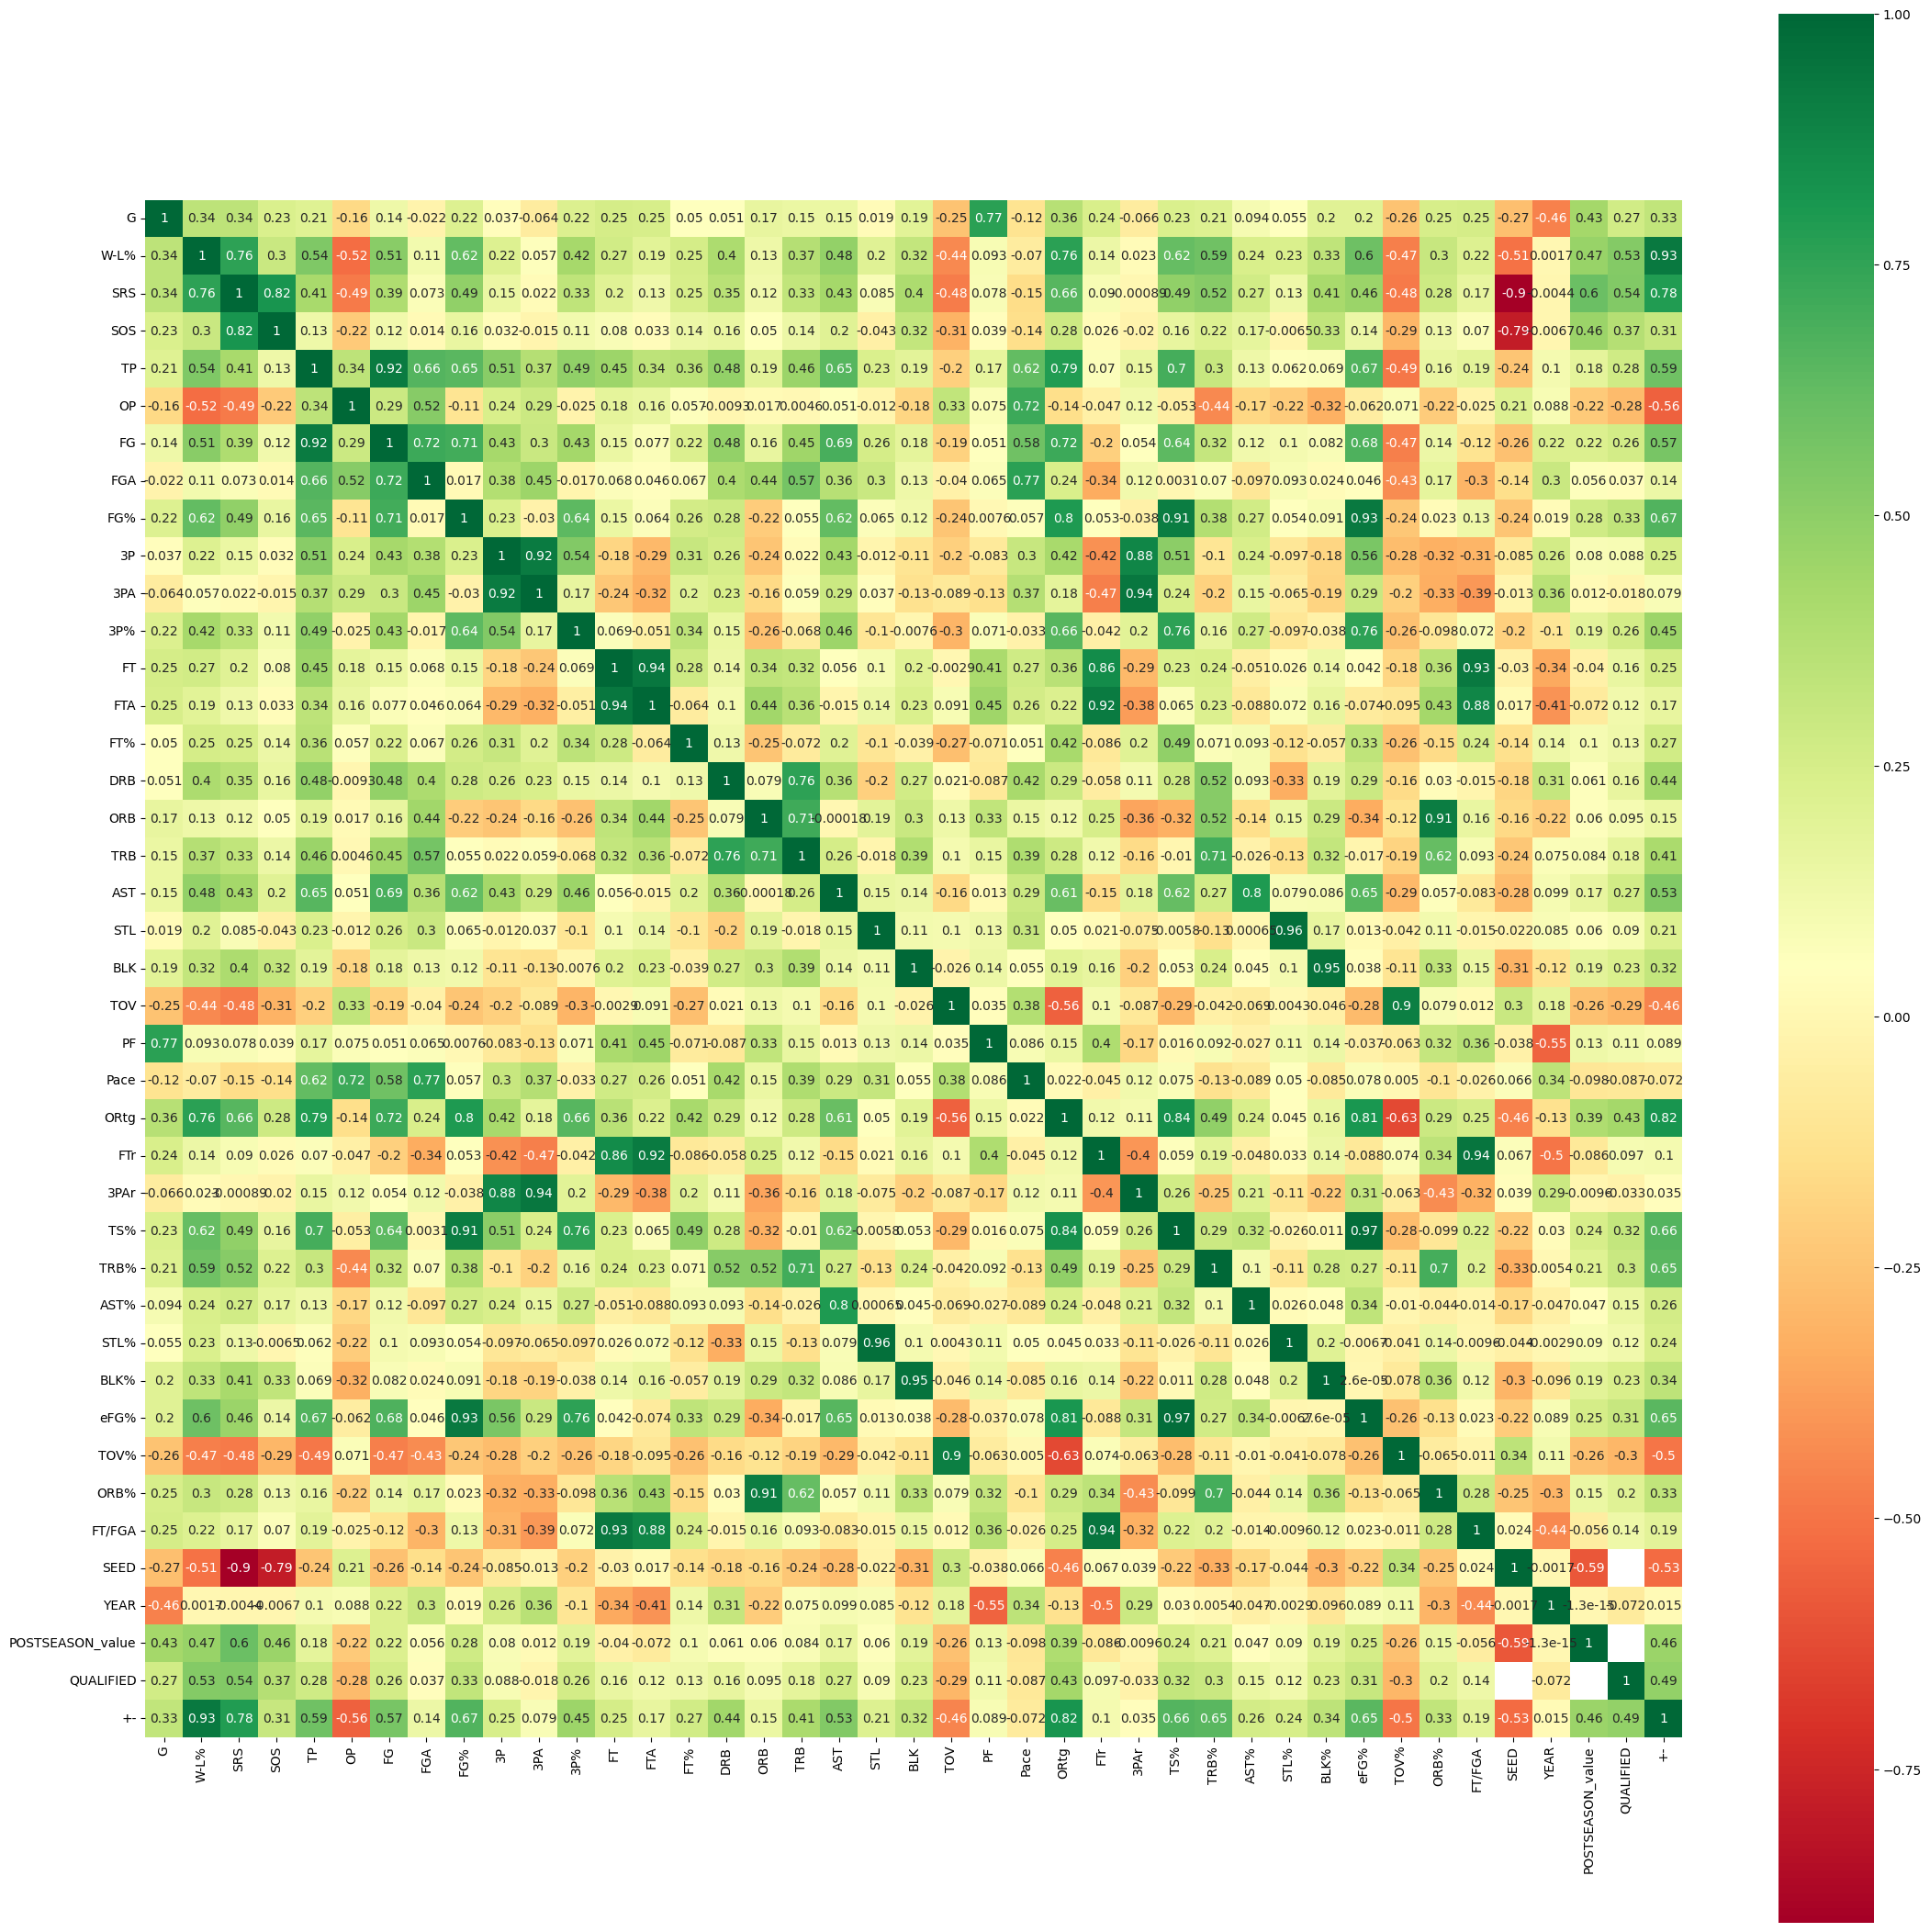

In [4]:
plt.figure(figsize=(27, 27))
drop = ['School','Overall.W', 'Overall.L', 'Conf.W', 'Conf.L', 'Home.W', 'Home.L', 'Away.W', 'Away.L', 'MP', 'POSTSEASON', 'REGION']
df.drop(drop, axis=1, inplace=True)
df['QUALIFIED'] = ~pd.isna(df['SEED'])
df['+-'] = df['TP'] - df['OP']

p = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', square=True)

In [5]:
corr_mat = df.corr()
corr_mat['POSTSEASON_value'].sort_values(ascending=True)

SEED               -5.894139e-01
TOV%               -2.615383e-01
TOV                -2.603491e-01
OP                 -2.197114e-01
Pace               -9.807769e-02
FTr                -8.582118e-02
FTA                -7.240396e-02
FT/FGA             -5.622841e-02
FT                 -4.041431e-02
3PAr               -9.583853e-03
YEAR               -1.349671e-15
3PA                 1.197437e-02
AST%                4.704292e-02
FGA                 5.623253e-02
ORB                 6.009560e-02
STL                 6.018743e-02
DRB                 6.147623e-02
3P                  7.986545e-02
TRB                 8.435935e-02
STL%                8.994689e-02
FT%                 9.973118e-02
PF                  1.313157e-01
ORB%                1.491628e-01
AST                 1.669254e-01
TP                  1.795607e-01
BLK                 1.874314e-01
3P%                 1.887290e-01
BLK%                1.906536e-01
TRB%                2.118640e-01
FG                  2.199897e-01
TS%       

<AxesSubplot: xlabel='+-', ylabel='SRS'>

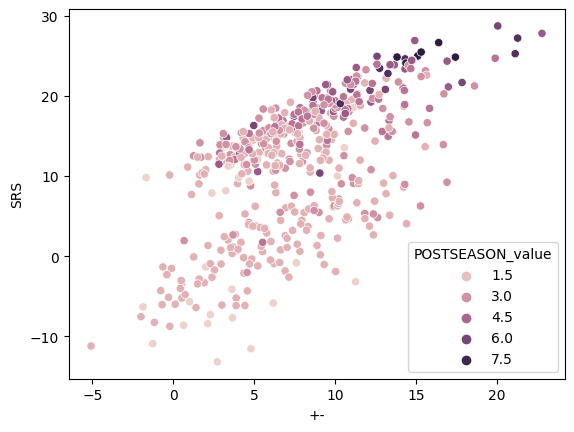

In [7]:
sns.scatterplot(y=df['SRS'], x=df['+-'], hue=df['POSTSEASON_value'])